### 1. Generación de puntos ficticios que se van a clasificar

Se van a generar un conjunto de puntos de forma aleatoría, los cuales se van a usar como el set de datos a clasificar. 

<!--<p style="color: red"> <b>EJERCICIO</b> </p>-->

Para esto, se va a usar de una funcion de distribucion gaussiana multivariada a la cual se le va a suministrar la matriz de covarianza y las medias, para generar 3 clusters aleatoriamente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
#punto 1a del parcial Generación de puntos ficticios que se van a clasificar
# Elementos de la diagonal de la matriz de covarianza de cada grupo
covs_diag = [[10,10],
 [8,16],
 [5,5]]
# Medias mu_x y mu_y para cada grupo de puntos
means = [[40,20], 
 [30,40],
 [45,45]]
def generate_gaussian_points(means, covs, points_by_group=3):
    """
    This function generate a set of ngroups of data following a multivariate
    gaussian distribution.
    
    Parameters
    ----------
    means: list
        value of means in x and y for each group. It must be a 2-dimensional 
        array where the length indicate the number of clusters.
    covs: list
        diagonal values of covariance matrix
    point_by_groups: int
        number of points by group
    Returns
    ----------
    points: numpy.array
        2-dimensional array with the set of points. It must be a 
    """  
    
    # Seed to generate the same random point. DO NOT CHANGE
    np.random.seed(100)
    
    #===== START CODE HERE =====
    b=list(map(np.diag,covs_diag))# diagonalization of the covariance matrix entries
    data= np.vstack([np.random.multivariate_normal(mean, covariance,points_by_group) for (mean, covariance) in zip(means, b)])#creation of sample following one gaussian multivariate distribution
    return data
    #===== END CODE HERE =====
test = generate_gaussian_points(means, covs_diag, 2)
print(test)
assert test.ndim == 2
assert test.shape == (6,2)
    

[[34.46675573 21.08365058]
 [43.64621936 19.20172716]
 [31.45443052 43.92528315]
 [26.97346042 40.88471868]
 [44.57627444 45.57020056]
 [43.97582052 45.97305514]]


Se generan los puntos con los cuales se van a trabajar:

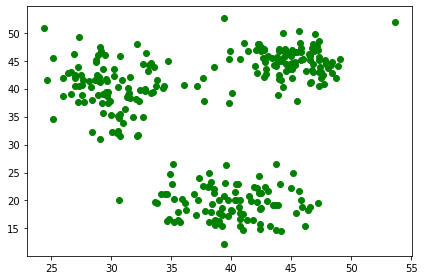

In [2]:
#1b, generacion de puntos en los cuales se van a trabajar
X = generate_gaussian_points(means, covs_diag,points_by_group=100)
xp,yp = X.T
assert X.shape == (300,2)
plt.plot(xp,yp,'o',c="green")
plt.tight_layout();

<br>
Normalización de los datos, por columna, usando el Z-score: 

$$ Z = \dfrac{x-\mu}{\sigma}$$

[[-0.58613537 -1.19752253]
 [ 0.76083326 -1.36051061]
 [ 0.68115342 -1.15054227]]


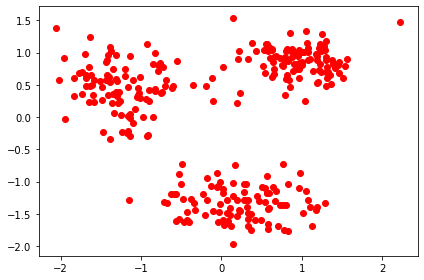

In [3]:
#1c, normalización de los datos
from sklearn.preprocessing import StandardScaler
X = generate_gaussian_points(means, covs_diag,points_by_group=100)
scaler = StandardScaler()#instance of class
scaler.fit(X)
Xnormal= scaler.transform(X)#normal vector of data
assert Xnormal.shape == X.shape
print(Xnormal[:3])
plt.plot(Xnormal[:,0],Xnormal[:,1],'o',c="r")
plt.tight_layout();

## 2.  Generacion de los centroides iniciales

Se va a escribir una funcion que genere un conjunto de puntos (una tripleta) que corresponderan a los centroides iniciales. Para ello, se van a usar el conjunto de puntos normalizados y se debe determinar el entero por la izquierda del número mayor obtenido del valor absoluto del conjunto de puntos: 

$$ \{ nmax:\; nmax = floor( max(|x_i|,|y_i|) ) \quad i=1,2,...,n \}$$

Con este valor, se va a generar un arreglo aleatorio de $(k,2)$ numeros enteros entre $-nmax$ y $nmax$:

In [4]:
#2 generacion de centroides iniciales
def generate_initial_centroids(X,k):
    """
    Create a set of k paired points in xy plane
    
    Parameters
    ----------
    X : 2D numpy.array
        Set of point to classify
    k : int
        number of centroids
        
    Returns:
    centroid: 2D-numpy .array
        matrix with the initial centroids
    """
    
    # select initial centroids
    np.random.seed(200)
    #===== START CODE HERE =====
    nmax=int(np.floor(np.amax(np.abs(Xnormal))))#construction of condition for initial centroids
    centroid=np.random.randint(-nmax, nmax, (k, 2))#construction of initials centroids
    return centroid  
    #===== END CODE HERE =====
initial_centroids = generate_initial_centroids(Xnormal,3)
old_centroids = initial_centroids
print(initial_centroids)
assert isinstance(initial_centroids,np.ndarray)
assert initial_centroids.shape == (3,2)
    

[[ 0 -1]
 [-2 -2]
 [ 0  1]]


## 3. Cálculo de la distancia de los puntos a cada centroide

Se va a escribir una funcion que, dado el conjunto de puntos normalizados `Xnormal` y los centroides, determine la distancia de todos los puntos a cada centroide. Si `Xnormal` es un 2D-array de $(n,2)$, y el de los centroides es un 2D-array de (k,2), esta funcion debe devolver un arreglo de $(n,k)$, donde $k$ es el número de centroides. La funcion debe calcular la distancia euclidiana.

[[0.6162922  1.61911322 2.25997668]
 [0.83866465 2.82418155 2.46464901]
 [0.69520159 2.80245914 2.2417652 ]]


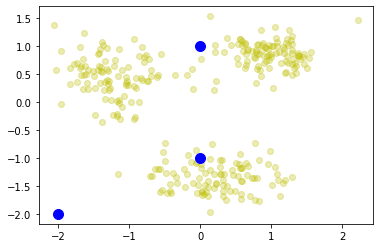

In [6]:
#3 calculo de distancias entre puntos y centroides iniciales
import numpy as np
from math import sqrt
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
def calculate_distance(X,Xref):
    """
    Calculate the euclidean distance between the array X and the array Xref. It is
    important to note that X and Xref do not need to have the same number of rows.
    If X is a (m,n)-array and Xref is a (k,n)-array, the function must return an 
    array of dim (m,k).
    
    Parameters
    ----------
    
    X : 2D-numpy.array
        Set of paired-points
    Xref : 2D-numpy.array
        set of k-points (x,y) that represent the centroids
        
    Returns
    ----------
    
    dist : 2D-numpy.array
        2-dimensional array with the distance of 
        
    """
    
    #===== START CODE HERE =====
    Y = cdist(X, Xref, 'seuclidean', V=None)#euclidean distance for normal data and initial centroids
    return Y
    #===== END CODE HERE =====
    
dist = calculate_distance(Xnormal,initial_centroids)
print(dist[:3])
assert dist.shape == (300,3)
plt.scatter(*Xnormal.T,c='y',alpha=0.3)
plt.scatter(*initial_centroids.T,s=10**2,c="blue",marker="o",edgecolor="blue")


## 4. Asignacion de etiquetas acorde al centroide mas cercano

Una vez determinada la distancia de cada punto respecto a los centroides, se debe determinar a cual cluster pertenece. La aiguiente función debe determinar a que cluster pertenece cada punto, numerado de $0$ a $k-1$ y regresar un arreglo unidimensional con estas etiquetas, de tamaño igual al total de puntos.

In [7]:
#4 asignacion de etiquetas de acuerdo al centroide más cercano
def set_label(dist_matrix):
    """
    Set a label to each point, determined by the distance between the point and the centroid
    
    Parameters
    ----------
    
    dist_matrix :  2D-np.array
        An (n,k) array with the distance of each point to the k centroids
    
    Returns
    ----------
    labels: 1D-np.array
        Array of size n with the labels assigned to each point.
    """
    #===== START CODE HERE =====
    return np.argmin(dist_matrix, axis=1)#labels for each component of data matrix
    #===== END CODE HERE =====    
cluster = set_label(dist)
print(cluster[::10])
cluster.size
assert cluster.size == 300
assert cluster.shape == (300,)    

[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


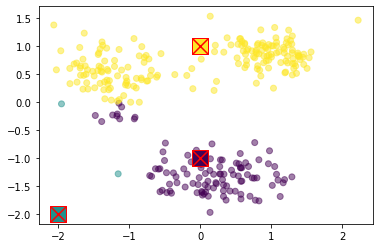

In [8]:
#grafico de la configuracion inicial de los puntos
plt.scatter(*Xnormal.T,c=cluster,alpha=0.5)
plt.scatter(*initial_centroids.T,s=16**2,c=range(3),marker="s",edgecolor="r")
plt.scatter(*initial_centroids.T,s=16**2,c="r",marker="x",edgecolor="r")


### 5. Determinacion de los nuevos centroides

Una vez determinada las etiquetas, se determinan los nuevos centroides.

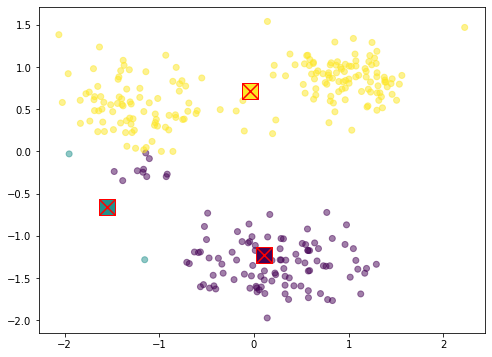

In [9]:
#5 creacion de nuevos centroides
def set_new_centroid(X,labels,k):
    """
    Determine the new centroids
    
    Parameters
    ----------
    
    X : 2D-numpy.array
        Set of n paired-points
    labels : numpy.array
        Array with the cluester label for each point
    k : int
        number of clusters or centroids
    
    Returns
    ----------
    centroid: 2D-numpy.array
        An array of size (k,2) that contain the new centroids.
    """
    
    #===== START CODE HERE =====
    
    centroids = np.zeros((k, Xnormal.shape[1]))#matrix of dimension (k,n)
    for i in range(0,k):
        centroids[i, :] = np.mean(Xnormal[labels == i, :], axis=0)#update matrix of centroides
    return centroids 
    #===== END CODE HERE =====
new_centroids = set_new_centroid(Xnormal, cluster, 3)  
assert new_centroids.shape == (3,2)
plt.figure(figsize=(8,6))
plt.scatter(*Xnormal.T,c=cluster,alpha=0.5)
plt.scatter(*new_centroids.T,s=16**2,c=range(3),marker="s",edgecolor="r")
plt.scatter(*new_centroids.T,s=16**2,c="r",marker="x",edgecolor="r")

### 6. Realizar el proceso iterativo

Para realizar la clasificacion de los puntos, los anteriores pasos se tienen que repetir las n veces que se necesite, hasta que el sitema converja. ALgunas veces el sistema no va a llegar a una solucion estable, por lo que es necesario establecer un número máximo de iteraciones.

#### 6.1 Condicion de parada de la iteracion

Se va a escribir una funcion que determine si la iteración debe parar o no. Esta funcion recibe los centroides, calcula el error absoluto entre los centroides nuevos y los de la iteracíon anterior, y devuelve un booleano: `True(1), False(0)` si es mayor o menor a un error:

$$ |X_C^{new} - X_C^{old} | < \varepsilon$$ 

La funcion debe validar si se satisface la anterior condicion de parada o si se alcanza el máximo de iteraciones.

In [12]:
from numpy.linalg import norm
#6.1 condicion de parada de la iteracion 
def stop_iter( Xc_new, Xc_old, error, iteration, iter_max = 300):
    """
    Determine if Xc_new and Xc_old are approximatlye the same, with certain error
    
    Parameters
    ----------
    
    Xc_new : 2D-numpy.array
        array with the new k centroid positions
    Xc_old : 2D-numpy.array
        array with the old k centroid positions
    error : float
        the convergence limit value of the problem
    iteration: int
        the actual iteration
    iter_max : int
        the maximum iteration number allowed
    
    Returns
    ----------
    boolean        
    
    """
    
    #===== START CODE HERE =====
    result=False
    num_iter = iteration
    diff=norm(Xc_new-Xc_old)#absolute error between new centroids and old centroids
    if diff<error or num_iter>=iter_max:#stop condition for cicle while
        result=True
    else:
        result=False
    return result    
    #===== END CODE HERE =====
    
assert stop_iter(new_centroids,initial_centroids,0.001, 1, 200) == False
assert stop_iter(new_centroids,initial_centroids,0.001, 300, 200) == True
assert stop_iter(new_centroids,initial_centroids,100, 100, 200) == True
assert stop_iter(new_centroids,initial_centroids,100, 500, 200) == True    


### 6.2 Proceso completo de iteración

En esta parte se va a integrar todos los procesos y las funciones hechas anteriormente, para poder armar un solo algoritmo que permita clasificar un conjunto de puntos por el método de Kmeans. Para desarrollar esto tenga en cuenta lo siguiente:

 - EL numero máximo de iteraciones va a ser 100 : MAX_ITER = 100
 - El error que va a usar es 0.0001
 - El número de cluster(K) va a ser 3
 - Los puntos que va a usar, son los generados y normalizado en pasos anteriores: Xnormal. No debe vovlerlos a generar
 - Debe generar nuevamente los centroides iniciales
 - Debe calcular cada nuevo centroide y generar una clasificiacion de los puntos de forma iterable. ¿ Qué ciclo es el mas apropiado: while o for?
 - Recuerde que la función stop_iter devuelve un True si se debe parar la condicion y un False si no debe hacerlo. Tenga presente la forma en que funciona el ciclo while, si es el que va a usar
 - Debe graficar por cada iteración los nuevos centroides y los puntos, coloreados acorde a su cluster. Para esto se puede basar en los ejemplos usados en secciones anteriores. Tenga presente que para poder generar un nuevo grafico y no que queden todos sobre un mismo canvas, debe usar el comando `plt.figure`
 

In [14]:
#6.2 Proceso completo de iteración
def kmeans(Xc, X, K,error, max_iter, plot=True):
    
    # --- Initialize variables ---
    Xc_new = Xc
    
    #===== START CODE HERE =====
    iteration=0
    result=False
    #===== END CODE HERE =====
    
    # --- Plot initial configuration ---
    # Use Xc_new for that. 
    
    #===== START CODE HERE =====
    plt.scatter(*Xnormal.T,c='k',alpha=0.3)
    plt.scatter(*Xc_new.T,s=10**2,c="blue",marker="o",edgecolor="r")
    #===== END CODE HERE =====
    
    # --- Iterate the process ---
    #  * Remember that you need the actual centroids and the  
    #    centroids of the last iteration. You need to do a backup of
    #    the last one 
    #  * Here you must call the other functions int order to
    #     - calculate distance
    #     - classify the point assinging labels to them
    #     - determine the new centroids
    #   All this proces must be done until get convergente or reach
    #   a maximum number of iteration. You must stop the loop if one of this
    #   conditions is satisfied
    #  * You must plot the points and centroids for each iteration
    
    #===== START CODE HERE =====
    while result==False: 
        Xc_old=Xc_new
        distance=calculate_distance(X,Xc_old)
        labels=set_label(distance)
        Xc_new=set_new_centroid(X,labels,K)
        iteration=iteration+1
        result=stop_iter( Xc_new, Xc_old, error, iteration,max_iter)
        plt.figure(figsize=(8,6))
        plt.scatter(*X.T,c=labels,alpha=0.5)
        plt.scatter(*Xc_new.T,s=16**2,c=range(3),marker="s",edgecolor="r")
        plt.scatter(*Xc_new.T,s=16**2,c="r",marker="x",edgecolor="r")
    return labels
    #===== END CODE HERE =====
    

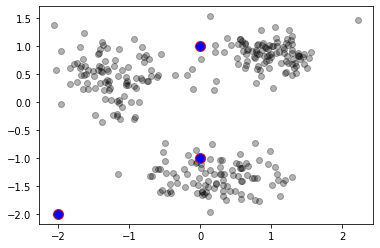

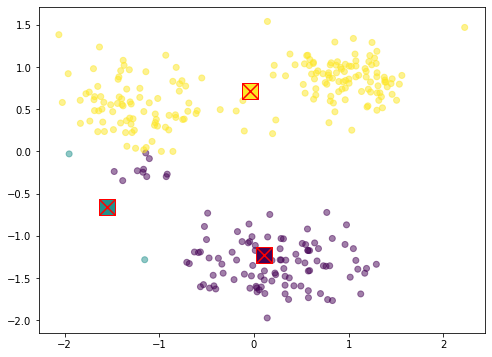

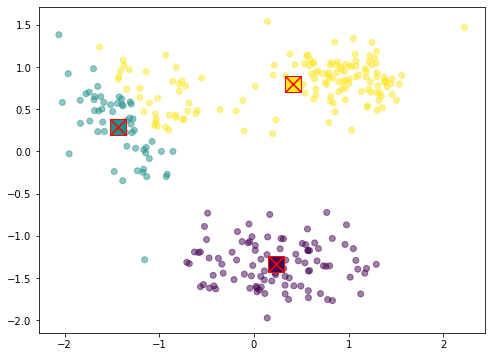

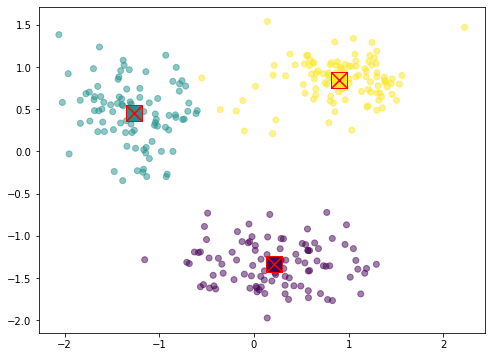

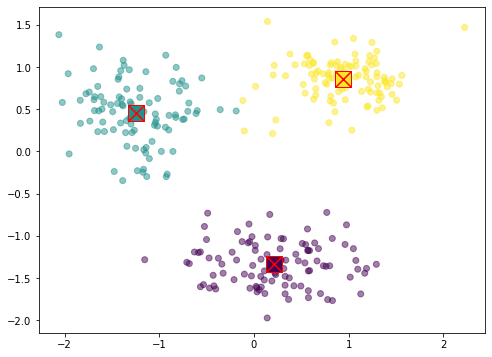

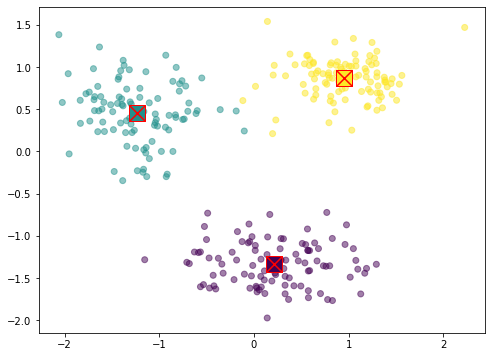

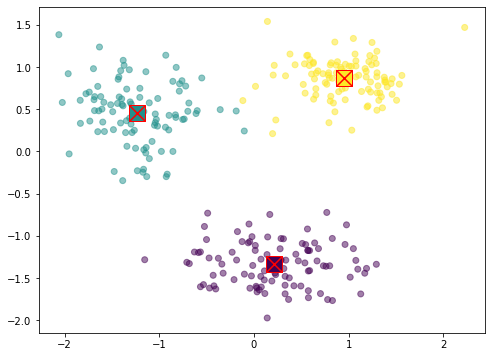

In [15]:
# --- Max iteration ---
MAX_ITER = 100

# --- Error ---
error = 0.0001

# --- Number of clusters ---
K = 3
#-- dataset
Xnormal
#--initial centroids
Xc=generate_initial_centroids(Xnormal,K)
#---kmeans algorithm
labels=kmeans(Xc, Xnormal, K,error, MAX_ITER , plot=True)


In [12]:
assert labels.size == 300
assert labels.shape == (300,)
#6.3 Guardar los datos clasificados
values=np.column_stack((X[:,0],X[:,1],labels))
assert values.shape == (300,3)
assert (values[:,2]-labels).sum() == 0
Tabla = """\
+--------------+
 |  Header    | 
 |X  Y  labels|
|-------------|
{}
"""
Tabla = (Tabla.format('\n'.join("| {:<4} {:<4} {:>8} |".format(*fila)#creation of table for data 
for fila in values)))
valuesdata=open("train_data.txt","w")
valuesdata.write("values=%s"%Tabla)
valuesdata.close()

In [15]:
header = "X    Y    Labels"
np.savetxt("traindata.txt",values,fmt="%12s %12s %8s ",header=header)